# Previsão de vendas com séries temporais

### [Danilo Gustavo Bispo]

## Conteúdo

1. [Introdução](#Introdução)

2. [Licença](#Licença)

3. [A problematização de negócio](#A-problematização-de-negócio)

4. [Checando os dados](#Checando-os-dados)

5. [Análise exploratória](#Análise-exploratória)

6. [Limpeza dos dados](#Limpeza-dos-dados)

7. [Criação do modelo](#Criação-do-modelo)

## Introdução

[[ voltar_ao topo ]](#Conteúdo)

Neste notebook será apresentado um pipeline básico de análise de dados no intuito de representar um típico workflow de projeto em ciência de dados.

Além de oferecer o código, a idéia é demonstrar um conjunto de boas práticas na tentativa de tornar o exemplo mais eficaz e colaborativo junto à comunidade de cientistas de dados. 

Será seguido o checklist do livro [The Elements of Data Analytic Style](https://leanpub.com/datastyle). Um guia rápido e gratuito para realização de análises de dados.

## Licença

[[ voltar ao topo ]](#Conteúdo)

No geral este material está disponibilizado para que seja utilizado e compartilhado de maneira plena.

## A problematização de negócio

[[ voltar ao topo ]](#Conteúdo)

O objetivo deste projeto consiste na criação de uma aplicação que sirva como ferramenta para estimar a previsão de vendas no intuito de ajudar o departamento melhorar seus ganhos e benefícios quando estiverem em busca de selecionar campanhas promocionais.

Será realizado como atividade principal análise exploratória, a fim de identificar possíveis correlações, tendencias e problemas com os dados. Logo após elaborar features através do conteúdo extraído do conteúdo histórico das vendas.

Em seguida será criado um modelo de machine learning que faz utilização das features recém criadas para então
tentar identificar e predizer tendencias de vendas futuras conforme estudos em períodos e datas específicas como feriados e épocas festivas


O conjunto de dados que esta sendo utilizado é da competição [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales/data) do kaggle — incluso junto com este notebook. Para fins de demonstração, este dataset foi alterado de modo que seja representado em português do Brasil.


## Checando os dados

[[ voltar ao topo ]](#Conteúdo)

O próximo passo consiste em lançar uma visão sobre os dados com os quais se pretende trabalhar. Considerando que por mais aparentemente acurado os dados possam parecer estar, eles podem conter erros, portanto torna-se importante pontuar os erros antes de iniciar o processo de análise.

Por exemplo, as considerações servem para responder as seguintes questões:

* Existe algo de errado com os dados?
* Existe alguma peculiaridade com os dados?
* Será preciso corrigir ou remover algo relacionado aos dados?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
vendas_df = pd.read_csv('vendas.csv')

In [4]:
vendas_df.head(5)
# estudo dirido sob aproximadamente 1 milhão de observações
# 1115 lojas
# as vendas pertencem a variável alvo ou seja o que tentaremos predizer

# Id: Identificacao da transação (combinação de id_loja e data)
# Id_loja: idendificador da loja
# Vendas: vendas/dia, variavel alvo
# Clientes: numero de clientes em um determinado dia
# Aberta: indica se a loja esta aberta (1) ou fechada (0)
# Promo: indica se a loja está com alguma promocao (1) no dia ou não (0)
# Feriado: indica o tipo de feriado (a = nacional, b = estadual, c = municipal, 0 = indica não feriado)
# FeriasEscolares: indica se a loja foi afetada pela ocorrencia de férias escolares

,id_loja,diasemana,data,vendas,clientes,aberta,promo,feriado,feriasescolares
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
vendas_df.tail(10)

,id_loja,diasemana,data,vendas,clientes,aberta,promo,feriado,feriasescolares
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
vendas_df.info()
# 8 features, cada contendo 1017209 data points
# 1 variavel alvo (vendas)
# 9 colunas no total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   id_loja          1017209 non-null  int64 
 1   diasemana        1017209 non-null  int64 
 2   data             1017209 non-null  object
 3   vendas           1017209 non-null  int64 
 4   clientes         1017209 non-null  int64 
 5   aberta           1017209 non-null  int64 
 6   promo            1017209 non-null  int64 
 7   feriado          1017209 non-null  object
 8   feriasescolares  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
vendas_df.describe()

,id_loja,diasemana,vendas,clientes,aberta,promo,feriasescolares
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Alguns comentarios sobre as observações:

* media de quantidade de vendas por dia = 5773, min = 0, max - 41551
* media de numero de clientes = 633, min = 0, max = 7388

In [8]:
lojas_df = pd.read_csv('lojas.csv')

# tipoloja: variavel categorica para indicar o tipo de loja (a, b, c, d)
# sortimento: descreve o nível de sortimento da loja: a = basico, b = extra, c = estendido
# distanciaconcorrente: distancia do concorrente mais próximo em metros
# aberturaconcorrente [Mes/Ano]: fornece uma estimativa de quando ocorreu a abertura do concorrente
# promo2: indica a promoção continua e consecutiva para alguma loja (0 = loja nao participante, 1 = loja participante)
# promo2inicio [Semana/Ano]: data de quando a loja entrou com a promo2
# promotempo: descreve o intervalo de ocorrência da promo2 (em meses)

In [9]:
lojas_df.head(5)

,id_loja,tipoloja,sortimento,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano,promotempo
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Abr,Jul,Out"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Abr,Jul,Out"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
lojas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_loja                   1115 non-null   int64  
 1   tipoloja                  1115 non-null   object 
 2   sortimento                1115 non-null   object 
 3   distanciaconcorrente      1112 non-null   float64
 4   mesdeaberturaconcorrente  761 non-null    float64
 5   anodeaberturaconcorrente  761 non-null    float64
 6   promo2                    1115 non-null   int64  
 7   promo2semana              571 non-null    float64
 8   promo2ano                 571 non-null    float64
 9   promotempo                571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
lojas_df.describe()

,id_loja,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Media da distancia dos concorrentes é de 5404 metros (5.4 km)

## Análise exploratória

[[ voltar ao topo ]](#Conteúdo)


A análise exploratória é a etapa em que podemos começar a nos aprofundar no conjunto de dados, além dos erros e discrepâncias. Procuraremos responder a perguntas como:

* Como os dados estão distribuídos?

* Existem correlações nos dados?

* Existem fatores de confusão que explicam essas correlações?


Este é o estágio em que plotamos todos os dados, mas não se preocupando com o visual, pois esses gráficos são para uso técnico analítico.

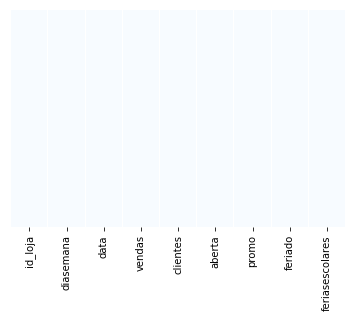

In [12]:
sns.heatmap(vendas_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121632da0>,
      dtype=object)

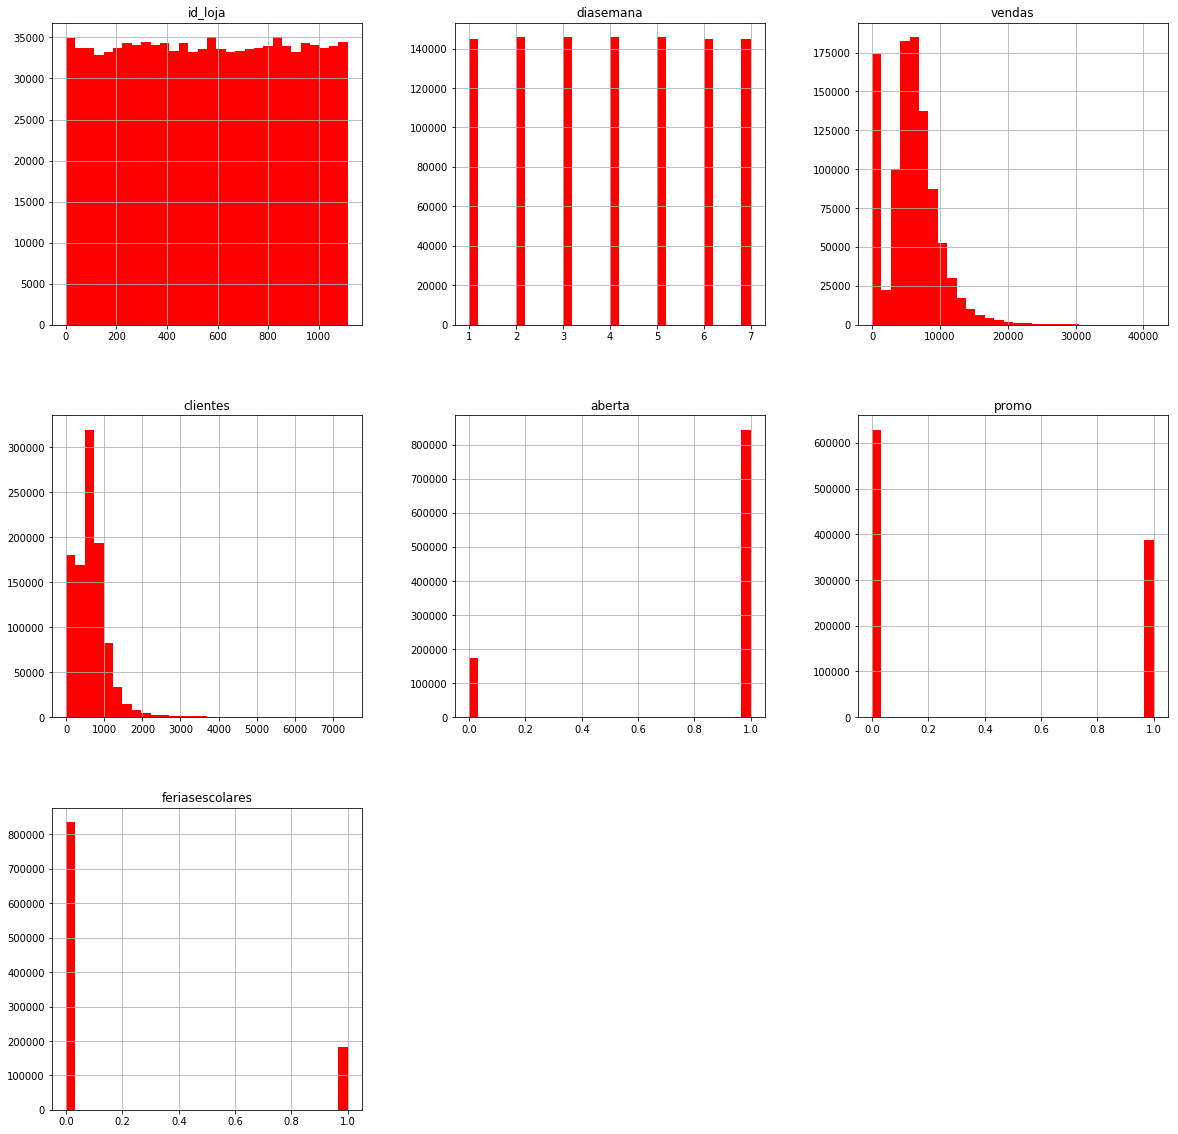

In [13]:
vendas_df.hist(bins = 30, figsize = (20,20), color = 'r')

Vale comentar sobre as observações:

* Media de 600 clientes por dia, max = 4500 (obs: nao podemos ver o outlier em 7388)
* Os dados estão igualmente distribuídos através dos dias da semana (~150000 observações  x 7 dias =˜1.1 milhões de observações)
* As lojas estão abertas ~80% das vezes
* Os dados estão igualmente distribuidos entre todas as lojas (sem viés)
* Promo1 estava ativa ~40% das vezes
* Media das vendas entre 5000-6000
* Férias escolares estão entre ~18% das vezes

In [14]:
vendas_df['clientes'].max()

7388

In [15]:
loja_fechada_df = vendas_df[vendas_df['aberta'] == 0]
loja_aberta_df   = vendas_df[vendas_df['aberta'] == 1]

In [16]:
# Contagem do numero de lojas que estão abertas e fechadas
print("Total =", len(vendas_df))
print("Número de lojas fechadas =", len(loja_fechada_df))
print("Número de lojas abertas =", len(loja_aberta_df))

Total = 1017209
Número de lojas fechadas = 172817
Número de lojas abertas = 844392


In [17]:
# descartando as lojas que estão fechadas
vendas_df = vendas_df[vendas_df['aberta'] == 1]

In [18]:
vendas_df.head(10)

,id_loja,diasemana,data,vendas,clientes,aberta,promo,feriado,feriasescolares
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [19]:
vendas_df.tail(10)

,id_loja,diasemana,data,vendas,clientes,aberta,promo,feriado,feriasescolares
1016588,494,2,2013-01-01,3113,527,1,0,a,1
1016606,512,2,2013-01-01,2646,625,1,0,a,1
1016624,530,2,2013-01-01,2907,532,1,0,a,1
1016656,562,2,2013-01-01,8498,1675,1,0,a,1
1016770,676,2,2013-01-01,3821,777,1,0,a,1
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1


In [20]:
# removendo colunas irrelevantes
vendas_df.drop(['aberta'], axis=1, inplace=True)

In [21]:
vendas_df.head(10)

,id_loja,diasemana,data,vendas,clientes,promo,feriado,feriasescolares
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
5,6,5,2015-07-31,5651,589,1,0,1
6,7,5,2015-07-31,15344,1414,1,0,1
7,8,5,2015-07-31,8492,833,1,0,1
8,9,5,2015-07-31,8565,687,1,0,1
9,10,5,2015-07-31,7185,681,1,0,1


In [22]:
vendas_df.describe()

,id_loja,diasemana,vendas,clientes,promo,feriasescolares
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Media de vendas = 6955, media de número de clientes = 762

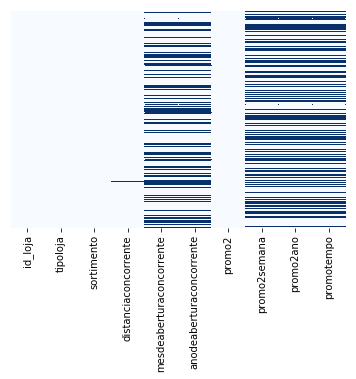

In [23]:
# Verificando a existência de dados missing no data set de lojas
sns.heatmap(lojas_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [24]:
# Avaliando os valores faltantes na coluna distanciaconcorrente
lojas_df[lojas_df['distanciaconcorrente'].isnull()]

,id_loja,tipoloja,sortimento,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano,promotempo
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Fev,Mai,Ago,Nov"


Apenas 3 linhas são faltantes 

In [25]:
# avaliando os valores faltantes na coluna 'mesdeaberturaconcorrente'
lojas_df[lojas_df['mesdeaberturaconcorrente'].isnull()]

,id_loja,tipoloja,sortimento,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano,promotempo
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Abr,Jul,Out"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Fev,Mai,Ago,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Set,Dez"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Abr,Jul,Out"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Set,Dez"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Abr,Jul,Out"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Total de 354 linhas (quase 1/3 das 1115 lojas cadastradas)

In [26]:
lojas_df[lojas_df['promo2'] == 0]

,id_loja,tipoloja,sortimento,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano,promotempo
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Existem 354 linhas onde mesdeaberturaconcorrente por mes e ano estão como valores missing. Será atribuído valores zeros para estes campos

In [27]:
str_cols = ['promo2semana', 'promo2ano', 'promotempo', 'anodeaberturaconcorrente', 'mesdeaberturaconcorrente']

for str in str_cols:
    lojas_df [str].fillna(0, inplace = True)

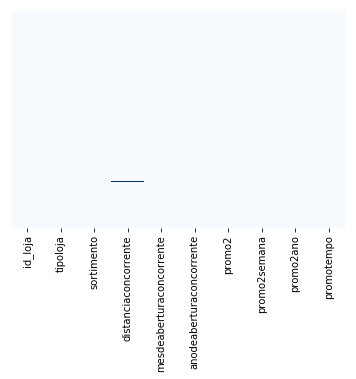

In [28]:
 sns.heatmap(lojas_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


Existem 3 linhas com valores faltantes referentes a coluna 'distanciaconcorrente'. Será preenchida com os valores da média desta mesma coluna

In [29]:
lojas_df['distanciaconcorrente'].fillna(lojas_df['distanciaconcorrente'].mean(), inplace = True)

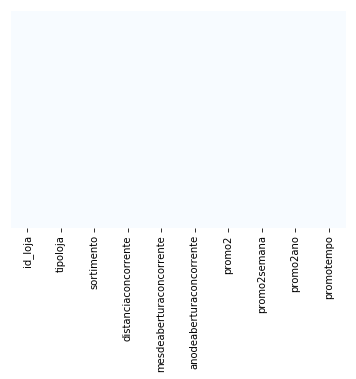

In [30]:
 sns.heatmap(lojas_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1249ddda0>,
      dtype=object)

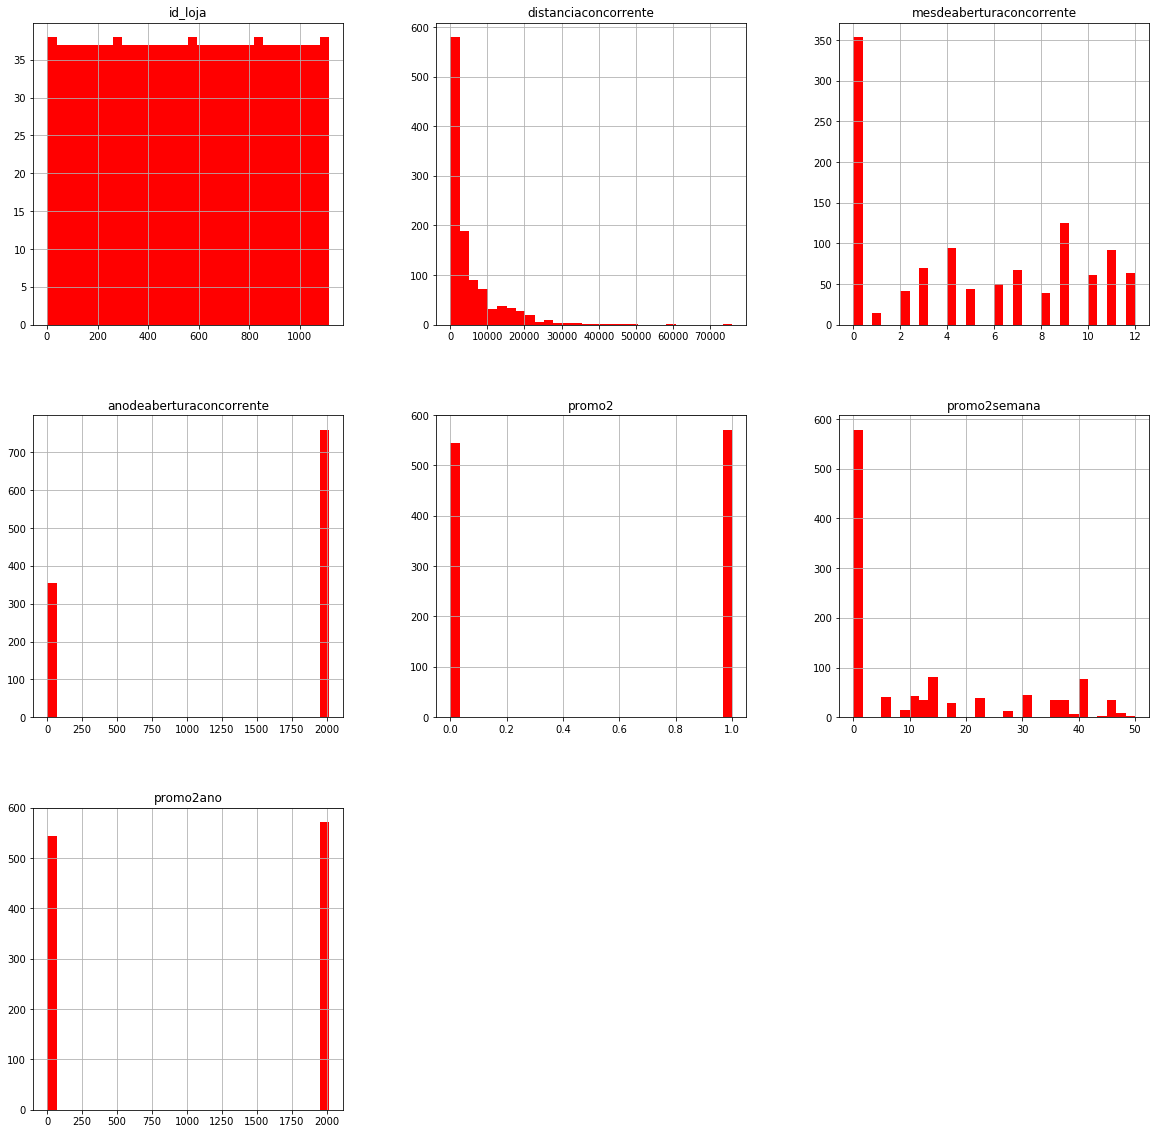

In [31]:
lojas_df.hist(bins = 30, figsize = (20,20), color = 'r')

Vale mais alguns comentários sobrea as observações:

* Metade das lojas estão com a promo2 ativada
* Metade das lojas tem seus concorrentes em até 3 kilometros de distância

In [32]:
# join dos dataframes pelo id_loja 
vendas_all_df = pd.merge(vendas_df, lojas_df, how = 'inner', on = 'id_loja') 

In [33]:
vendas_all_df.to_csv('vendasloja.csv', index=False)


In [34]:
vendas_all_df.head(10)

,id_loja,diasemana,data,vendas,clientes,promo,feriado,feriasescolares,tipoloja,sortimento,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano,promotempo
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,6,2015-07-25,4364,500,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,5,2015-07-24,3706,459,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,4,2015-07-23,3769,503,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,3,2015-07-22,3464,463,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,2,2015-07-21,3558,469,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [35]:
correlations = vendas_all_df.corr()['vendas'].sort_values()
correlations

diasemana                  -0.178736
promo2ano                  -0.127621
promo2                     -0.127596
promo2semana               -0.058476
distanciaconcorrente       -0.036343
mesdeaberturaconcorrente   -0.018370
anodeaberturaconcorrente    0.005266
id_loja                     0.007710
feriasescolares             0.038617
promo                       0.368145
clientes                    0.823597
vendas                      1.000000
Name: vendas, dtype: float64

Conforme demonstrado acima vale afirmar que:

* As colunas clientes e promo estão positivamente correlacionados com as vendas
* A coluna promo2 não parece estar sendo efetiva em boa parte das vendas

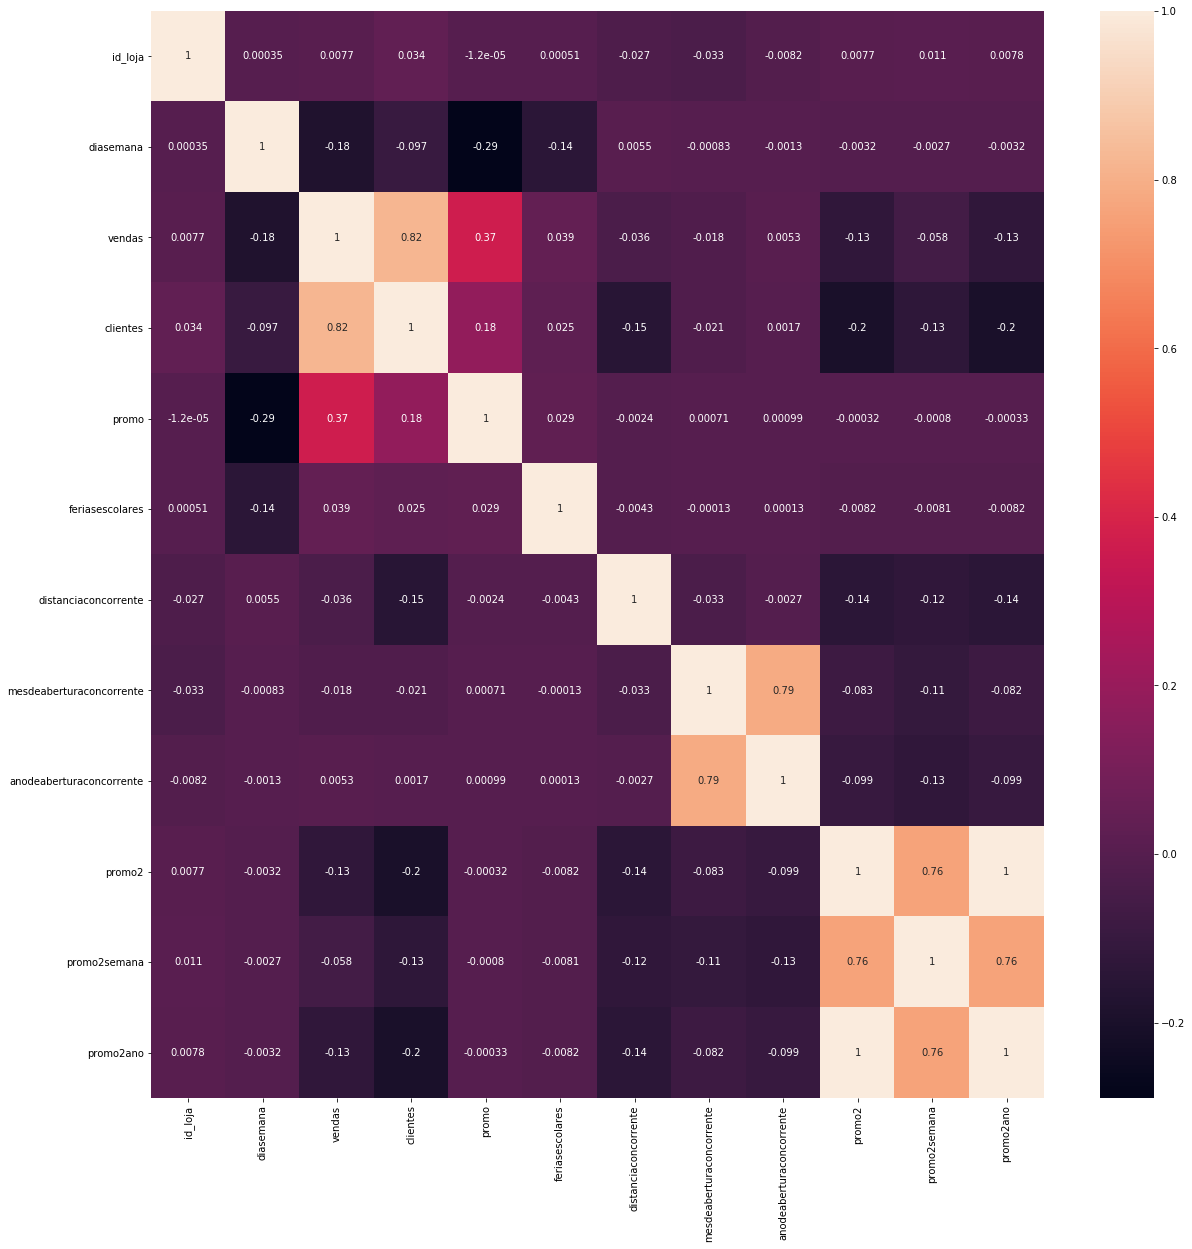

In [36]:
correlacoes = vendas_all_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlacoes, annot = True)

Como pode-se observar acima, clientes, promo2 e vendas estão fortemente correlacinadas

In [37]:
# obtendo dia, mes, ano e colocando em colunas separadas para melhor entendimento da distribuição das vendas
vendas_all_df['ano'] = pd.DatetimeIndex(vendas_all_df['data']).year
vendas_all_df['mes'] = pd.DatetimeIndex(vendas_all_df['data']).month
vendas_all_df['dia'] = pd.DatetimeIndex(vendas_all_df['data']).day

In [38]:
vendas_all_df.head(10)

,id_loja,diasemana,data,vendas,clientes,promo,feriado,feriasescolares,tipoloja,sortimento,distanciaconcorrente,mesdeaberturaconcorrente,anodeaberturaconcorrente,promo2,promo2semana,promo2ano,promotempo,ano,mes,dia
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
5,1,6,2015-07-25,4364,500,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,25
6,1,5,2015-07-24,3706,459,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,24
7,1,4,2015-07-23,3769,503,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,23
8,1,3,2015-07-22,3464,463,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,22
9,1,2,2015-07-21,3558,469,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,21


Vamos visualizar a média de vendas e número de clientes por mês

Text(0.5,1,'Media mensal de clientes')

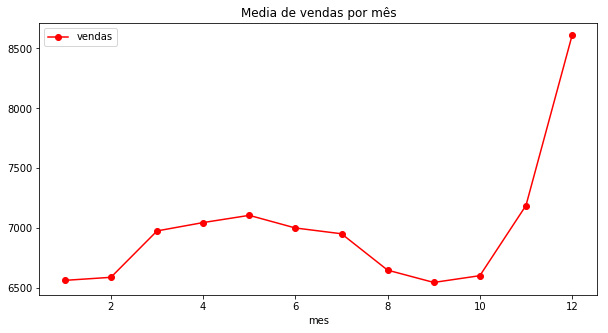

<Figure size 432x288 with 0 Axes>

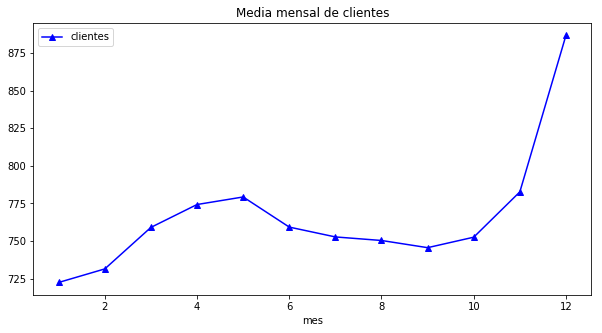

In [39]:
axis = vendas_all_df.groupby('mes')[['vendas']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de vendas por mês')

plt.figure()
axis = vendas_all_df.groupby('mes')[['clientes']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Media mensal de clientes')


Conforme demonstrado acima: as vendas e o número de clientes atingem seu pico no Natal

Agora verificando as vendas por dia do mes 

Text(0.5,1,'Media de vendas por dia')

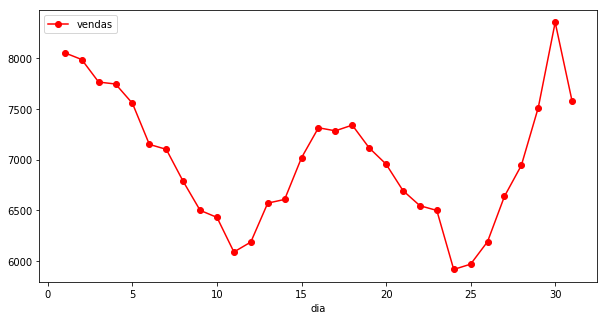

<Figure size 432x288 with 0 Axes>

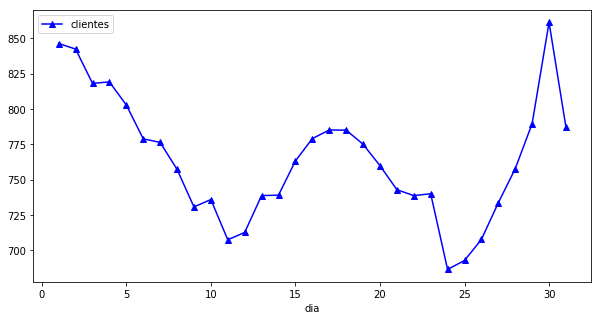

In [40]:
ax = vendas_all_df.groupby('dia')[['vendas']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de vendas por dia')

plt.figure()
ax = vendas_all_df.groupby('dia')[['clientes']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Media de vendas por dia')

Conforme indicado as vendas e o fluxo de clientes costumam aumentar entre os dias 15 e 20 com pico no final do mês.

Verificando agora para os dias da semana

Text(0.5,1,'Media de clientes por dia da semana')

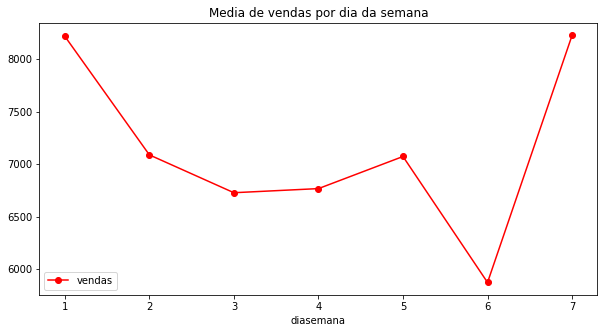

<Figure size 432x288 with 0 Axes>

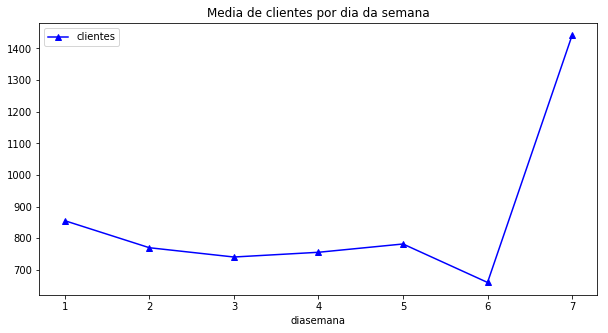

In [41]:
axis = vendas_all_df.groupby('diasemana')[['vendas']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de vendas por dia da semana')

plt.figure()
axis = vendas_all_df.groupby('diasemana')[['clientes']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Media de clientes por dia da semana')


Conforme indicado: o dia com mais fluxo de clientes e maior número de vendasz costuma ser o sábado

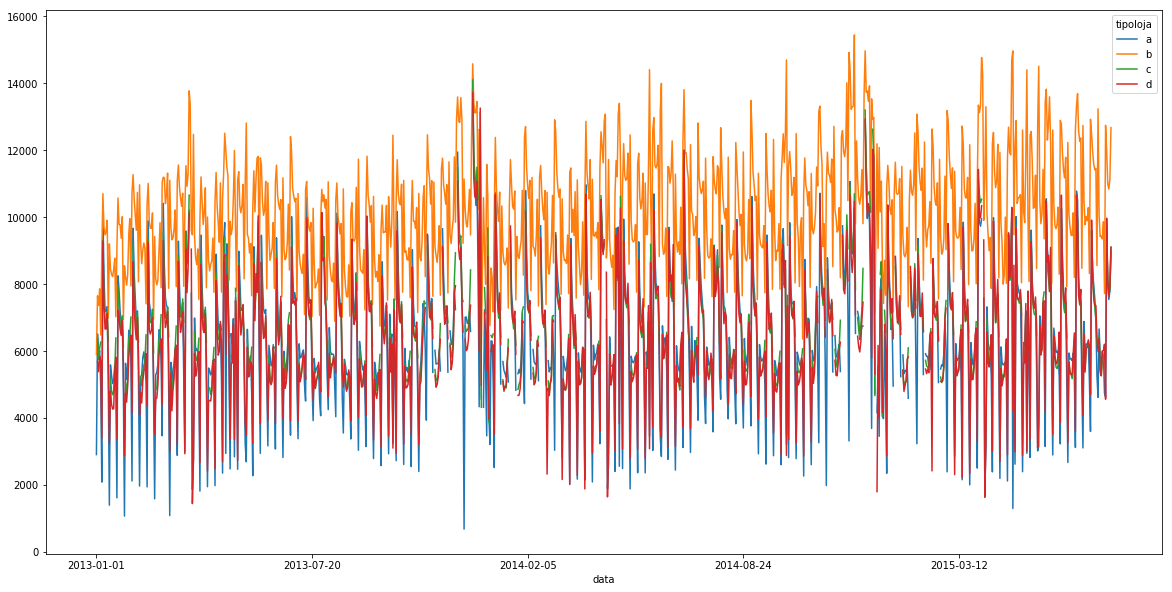

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
vendas_all_df.groupby(['data','tipoloja']).mean()['vendas'].unstack().plot(ax=ax)

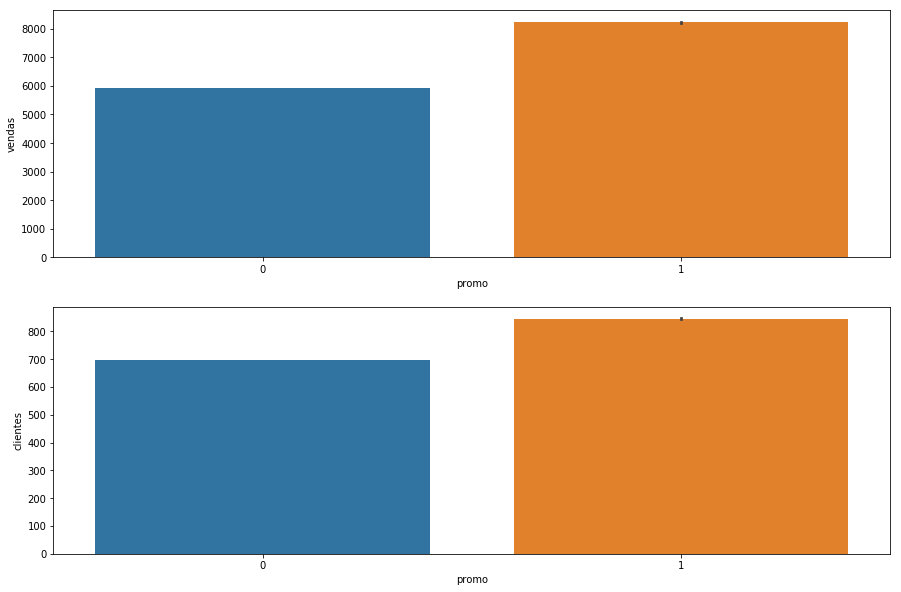

In [44]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'promo', y = 'vendas', data = vendas_all_df)

plt.subplot(212)
sns.barplot(x = 'promo', y = 'clientes', data = vendas_all_df)

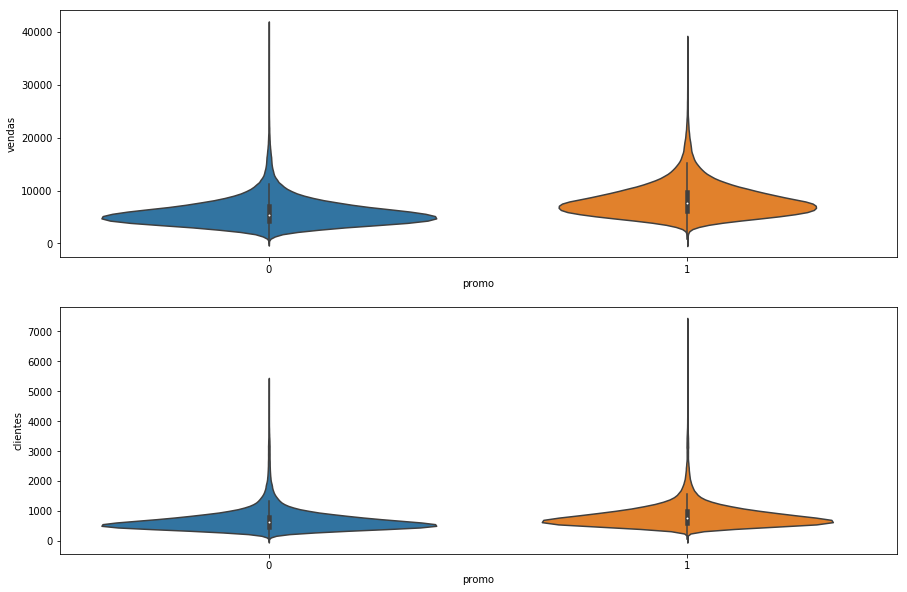

In [45]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'promo', y = 'vendas', data = vendas_all_df)

plt.subplot(212)
sns.violinplot(x = 'promo', y = 'clientes', data = vendas_all_df)

## Criação do modelo

[[ voltar ao topo ]](#Conteúdo)


Após assegurar que os dados estejam limpos e embuído com algum conhecimento - mesmo que superficial sobre suas distribuições e relacionamentos, chegou o momento de dar o próximo passo iniciando o processo de criação dos modelos de machine learning e dividir os dados em sets de treinamento e teste

Nesta seção, utilizaremos técnicas de séries temporais com base na ferramenta [Prophet](https://research.fb.com/prophet-forecasting-at-scale/) do facebook, como modelo adicional onde tendências não-lineares são ajustadas de acordo com sazonalidade anual, semanal e diária. A ferramenta Prophet trabalha melhor com séries temporais que possuem grandes efeitos sazonais em dados históricos. Ela implementa um modelo de regressão aditiva com quatro elementos principais:

* Lineariedade parcial, selecionando automaticamente pontos de mudança nos dados e identificando qualquer mudança nas tendências;
* Componente anualmente sazonal, modelado utilizando séries de Fourier;
* Componente semanalmente sazonal
* Uma lista de feriados que pode ser configurada manualmente

Dentre as principais características vale destacar também:
* Velocidade e precisão - Além da precisão prophet pode gerar resultados em segundos
* Automação - Sem a necessidade de realizar pré-processamento dos dados, além de funcionar com dados missing e outliers
* Integração com domínio de conhecimento - Usuários podem ajustar previsões ao adicionar domínio específido de conhecimento

In [46]:
from fbprophet import Prophet

In [47]:
# Função que recebe id_loja, dataframe e número de previsão para período futuro
# Cria feature de data/venda no format do Prophet  
# Finaliza gerando predição por série temporal
def previsao_vendas(id_loja, vendas_futura_df, periodo):
  vendas_futura_df = vendas_futura_df[ vendas_futura_df['id_loja'] == id_loja ]
  vendas_futura_df = vendas_futura_df[['data', 'vendas']].rename(columns = {'data': 'ds', 'vendas':'y'})
  vendas_futura_df = vendas_futura_df.sort_values('ds')
  
  model    = Prophet()
  model.fit(vendas_futura_df)
  future   = model.make_future_dataframe(periods=periodo)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Data', ylabel='Vendas')
  figure2  = model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/fbproph

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

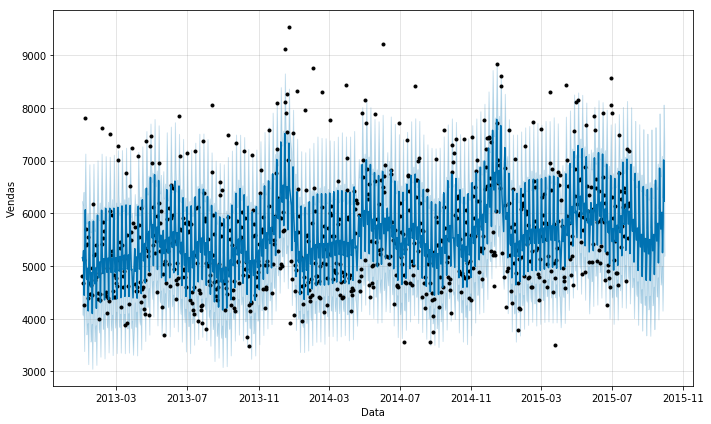

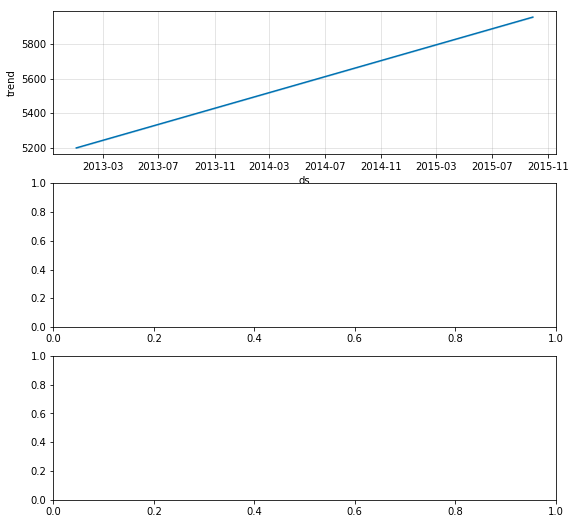

In [48]:
previsao_vendas(10, vendas_all_df, 60)

#### Treinando o modelo considerando dias de feriado e férias escolares

In [61]:
# Função que recebe id_loja, dataframe, dias de feriado e número de previsão para período futuro
def previsao_vendas_feriado(id_loja, vendas_futuras_df, feriados, periodos):
  vendas_futuras_df = vendas_futuras_df[ vendas_futuras_df['id_loja'] == id_loja ]
  vendas_futuras_df = vendas_futuras_df[['data', 'vendas']].rename(columns = {'data': 'ds', 'vendas':'y'})
  vendas_futuras_df = vendas_futuras_df.sort_values('ds')
  
  model    = Prophet(holidays = feriados)
  model.fit(vendas_futuras_df)
  future   = model.make_future_dataframe(periods = periodos)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Data', ylabel='Vendas')
  figure2  = model.plot_components(forecast)

In [62]:
# Obtendo todas as datas pertencente férias escolares
ferias_escolares = vendas_all_df[vendas_all_df['feriasescolares'] == 1].loc[:, 'data'].values
ferias_escolares.shape

(163457,)

In [63]:
ferias_escolares

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [64]:
# Obtendo todas as datas pertencentes a feriadas estaduais
feriados = vendas_all_df [ (vendas_all_df['feriado'] == 'a') | (vendas_all_df['feriado'] == 'b') | (vendas_all_df['feriado'] == 'c')  ].loc[:, 'data'].values
feriados.shape

(910,)

In [65]:
feriados = pd.DataFrame({'ds': pd.to_datetime(feriados),
                               'holiday': 'feriado'})

In [66]:
feriados

,ds,holiday
0,2014-10-03,feriados
1,2013-10-03,feriados
2,2015-06-04,feriados
3,2014-06-19,feriados
4,2013-05-30,feriados
...,...,...
905,2013-04-01,feriados
906,2013-08-15,feriados
907,2015-06-04,feriados
908,2014-06-19,feriados


In [67]:
ferias_escolares = pd.DataFrame({'ds': pd.to_datetime(ferias_escolares),
                                'holiday': 'ferias_escolares'})

In [68]:
ferias_escolares

,ds,holiday
0,2015-07-31,ferias_escolares
1,2015-07-30,ferias_escolares
2,2015-07-29,ferias_escolares
3,2015-07-28,ferias_escolares
4,2015-07-27,ferias_escolares
...,...,...
163452,2013-02-05,ferias_escolares
163453,2013-02-04,ferias_escolares
163454,2013-01-04,ferias_escolares
163455,2013-01-03,ferias_escolares


In [69]:
# concatenando férias escolares e feriados
feriado_ferias_escolares = pd.concat((feriados, ferias_escolares))

In [70]:
feriado_ferias_escolares.head(10)

,ds,holiday
0,2014-10-03,feriados
1,2013-10-03,feriados
2,2015-06-04,feriados
3,2014-06-19,feriados
4,2013-05-30,feriados
5,2015-06-04,feriados
6,2014-06-19,feriados
7,2013-05-30,feriados
8,2014-10-03,feriados
9,2013-10-03,feriados


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/fbproph

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

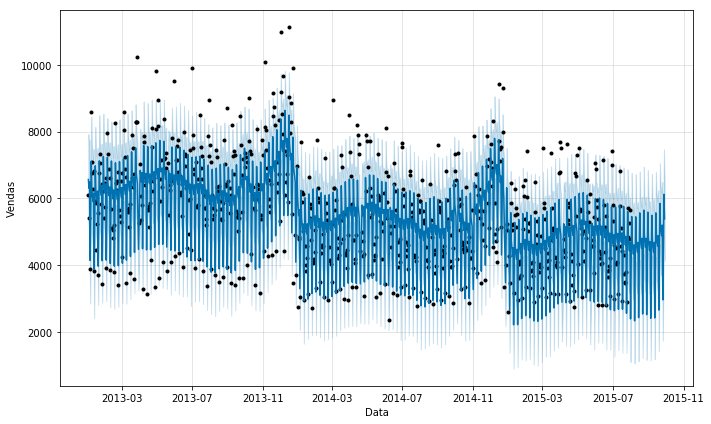

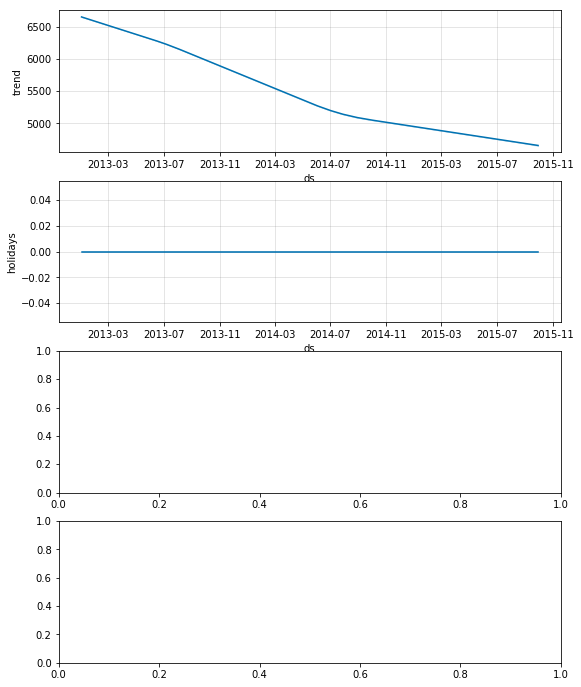

In [71]:
# Gerando previsões utilizando dias de feriado para lojas específicas
previsao_vendas_feriado(6, vendas_all_df, feriado_ferias_escolares, 60)